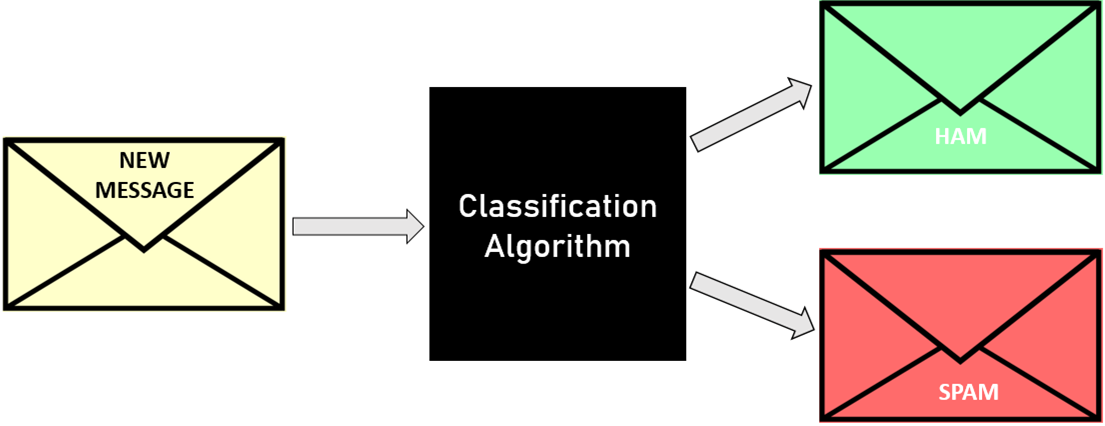

**Dataset Link:** https://www.kaggle.com/datasets/venky73/spam-mails-dataset

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
# API key from kaggle dataset

!kaggle datasets download -d venky73/spam-mails-dataset

100% 1.86M/1.86M [00:01<00:00, 2.10MB/s]
100% 1.86M/1.86M [00:01<00:00, 1.85MB/s]


In [3]:
# Unziping the dataset

import zipfile

# zip_ref = zipfile.ZipFile(file="/content/spam-mails-dataset.zip", mode='r')
# zip_ref.extractall('/content')
# zip_ref.close()

with zipfile.ZipFile(file="/content/spam-mails-dataset.zip", mode="r") as file:
    file.extractall(path="/content")
    print("Successfully Extracted")

Successfully Extracted


In [4]:
# Import necessary librarys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load dataset

df = pd.read_csv("/content/spam_ham_dataset.csv")

In [6]:
df.head(10)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [7]:
# Check how may row are there
df.shape

(5171, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [9]:
# check null values

df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [10]:
# Check the number of data which is much more spam or ham

df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

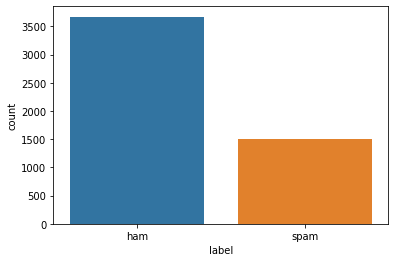

In [11]:
sns.countplot(x="label", data=df)
plt.show()

## Data cleaning

doc of contractions: https://github.com/kootenpv/contractions

In [ ]:
# contractions is the package in python used to expand the contractions in english
# language to their original form. Example: I'll to "I will"

!pip install -U contractions

In [13]:
# tqdm package is used to track the progress of work. It displays the percentage of loop done.
from tqdm import tqdm
import contractions

import re
import nltk
from nltk.corpus import stopwords

In [14]:
# Download stopwords from NLTK library

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
# Print the stopwords

stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
# Showed the 5 message and their label

for i in range(0, 5):
    print("label: ", df.loc[i, 'label'])
    print()
    print(df.loc[i, 'text'])
    print("*" * 30)

label:  ham

Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes .
******************************
label:  ham

Subject: hpl nom for january 9 , 2001
( see attached file : hplnol 09 . xls )
- hplnol 09 . xls
******************************
label:  ham

Subject: neon retreat
ho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !
i know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .
on the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the 

In [17]:
all_stopwords = stopwords.words('english')

In [ ]:
len(all_stopwords)

179

In [18]:
pre_processed_emails = []

for text in tqdm(df['text']):
    # Regular expression that removes all the html tags pressent in the reviews
    text = re.sub(pattern='(<[\w\s]*/?>)', repl="", string=text)

    # Expanding all the contractions present in the review to is respective actual form
    text = contractions.fix(text)

    # Removing all the special charactesrs from the review text
    text = re.sub(pattern='[^a-zA-Z0-9\s]+', repl="", string=text)

    # Removing all the digits present in the review text
    text = re.sub(pattern='\d+', repl="", string=text)

    # Making all the review text to be of lower case as well as removing the stopwords and words of length less than 3
    pre_processed_emails.append(" ".join([word.lower() for word in text.split() if word not in all_stopwords and len(word)>=3]))


100%|██████████| 5171/5171 [00:05<00:00, 1002.71it/s]


In [19]:
# Creating a new datafram using the Processed Reviews

clean_df = pd.DataFrame(data={
    'text' : pre_processed_emails,
    'label' : list(df['label']),
    'label_num' : list(df['label_num'])
})

In [20]:
clean_df.head(10)

,text,label,label_num
0,subject enron methanol meter follow note gave ...,ham,0
1,subject hpl nom january see attached file hpln...,ham,0
2,subject neon retreat around wonderful time yea...,ham,0
3,subject photoshop windows office cheap main tr...,spam,1
4,subject indian springs deal book teco pvr reve...,ham,0
5,subject ehronline web address change message i...,ham,0
6,subject spring savings certificate take save u...,ham,0
7,subject looking medication best source difficu...,spam,1
8,subject noms actual flow agree forwarded melis...,ham,0
9,subject nominations oct see attached file hpln...,ham,0


In [21]:
for i in range(0, 5):
    print("label: ", clean_df.loc[i, 'label'])
    print()
    print(clean_df.loc[i, 'text'])
    print("*" * 30)

label:  ham

subject enron methanol meter follow note gave monday preliminary flow data provided daren please override pop daily volume presently zero reflect daily activity obtain gas control change needed soon possible economics purposes
******************************
label:  ham

subject hpl nom january see attached file hplnol xls hplnol xls
******************************
label:  ham

subject neon retreat around wonderful time year neon leaders retreat time know time year extremely hectic tough think anything past holidays life past week december january like think minute calender handed beginning fall semester retreat scheduled weekend january youth ministers conference brad dustin connected week going change date following weekend january comes part need think think agree important get together time recharge batteries get far spring semester lot trouble difficult get away without kids etc brad came potential alternative get together weekend let know prefer first option would retr

In [22]:
# Split the data into dependent and independent variables

X = clean_df.loc[:, 'text']

y = clean_df.loc[:, 'label_num']

In [23]:
X.head()

0    subject enron methanol meter follow note gave ...
1    subject hpl nom january see attached file hpln...
2    subject neon retreat around wonderful time yea...
3    subject photoshop windows office cheap main tr...
4    subject indian springs deal book teco pvr reve...
Name: text, dtype: object

In [24]:
X.shape

(5171,)

In [25]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: label_num, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# Splitting the data such that 25% will be used for testing and the remaining 75% will be used for training. 

x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=41)

# when stratify is provided the splitting of data into train and test datasets agree 
# with the composition of actual possitive and negative reviews present in the dataset

In [28]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3878,), (1293,), (3878,), (1293,))

In [29]:
x_train

1664     subject enron hpl actuals january teco tap enron
1067    subject revised wellhead adjustments may daren...
4351    subject curtains hey curtains look good hope h...
4140    subject natural gas nomination enron methanol ...
1089    subject lst rev mar josey ranch nom forwarded ...
                              ...                        
2293    subject april vacation please submit scheduled...
3048    subject enron hpl noms february february teco ...
3376    subject deal tickets daren three meters flow f...
1913    subject issue fyi see note already done stella...
1728    subject meter heads putting firm ticket starti...
Name: text, Length: 3878, dtype: object

In [30]:
y_train

1664    0
1067    0
4351    0
4140    0
1089    0
       ..
2293    0
3048    0
3376    0
1913    0
1728    0
Name: label_num, Length: 3878, dtype: int64

**Word2Vec is a neural network model, that provides a numerical vector representation for a given word. This numerical vector is often called as "Word Embedding". Despite other methods of Bag of Words and TF-IDF, Word2Vec takes the context of the word into consideration while converting a word to a numerical vector.**

In [ ]:
!pip install -U gensim

In [32]:
import gensim
from gensim.models import Word2Vec

In [33]:
print("version of gensim: ", gensim.__version__)

# version of gensim:  4.3.1

version of gensim:  4.3.1


In [34]:
# If we want to train Word2Vec model then we have to apply word tokenize.
# That means for every sentence we have to make list of words

words_of_sentences = []

for sentence in tqdm(x_train):
    words_of_sentences.append(sentence.split())

100%|██████████| 3878/3878 [00:00<00:00, 117105.68it/s]


In [ ]:
len(words_of_sentences)

3878

In [35]:
words_of_sentences[0:2]

[['subject', 'enron', 'hpl', 'actuals', 'january', 'teco', 'tap', 'enron'],
 ['subject',
  'revised',
  'wellhead',
  'adjustments',
  'may',
  'daren',
  'please',
  'see',
  'attached',
  'spreadsheet',
  'changes',
  'requested',
  'kcs',
  'meter',
  'stand',
  'alone',
  'purchase',
  'buy',
  'sell',
  'kcs',
  'meters',
  'bob']]

In [36]:
# All perameters of Word2Vec Class

# def __init__(sentences=None, corpus_file=None, 
#              vector_size=100, alpha=0.025, 
#              window=5, min_count=5, 
#              max_vocab_size=None, 
#              sample=0.001, seed=1, 
#              workers=3, min_alpha=0.0001, 
#              sg=0, hs=0, negative=5, ns_exponent=0.75, 
#              cbow_mean=1, hashfxn=hash, epochs=5, 
#              null_word=0, trim_rule=None, sorted_vocab=1, 
#              batch_words=MAX_WORDS_IN_BATCH, 
#              compute_loss=False, callbacks=(), 
#              comment=None, max_final_vocab=None, 
#              shrink_windows=True)


In [37]:
# Training Word2Vec on our own corpus or custom dataset

# size=200 means our every word will represent 200 dimension vector space or features vector
# min_count=5 means a word will be consider if the word exists at least 5 times in the corpus
# workers=-1 means I want to use all core in my cpu for training time

model = Word2Vec(sentences=words_of_sentences, vector_size=200, workers=-1)

In [38]:
# Printing all similar words in the vocabulary 
# for a given random word present in our vocabulary

# One thing keep in mine if the word in present in your corpus
# then it will throw an error

# wv is an attribute

model.wv.most_similar(positive="lottery", topn=15)

[('delete', 0.2355632334947586),
 ('familiar', 0.22797536849975586),
 ('turbine', 0.21515940129756927),
 ('begins', 0.21437451243400574),
 ('drilling', 0.21399709582328796),
 ('extended', 0.21337845921516418),
 ('supported', 0.21259982883930206),
 ('receivable', 0.2115887701511383),
 ('charlene', 0.21019263565540314),
 ('variance', 0.2075181007385254),
 ('direct', 0.20733830332756042),
 ('healthy', 0.20670074224472046),
 ('yvette', 0.20547497272491455),
 ('sending', 0.20173944532871246),
 ('jonathan', 0.19616441428661346)]

In [39]:
model.wv.similar_by_word(word="volume", topn=15)

[('paradise', 0.23608438670635223),
 ('connevey', 0.22870859503746033),
 ('hilton', 0.227591410279274),
 ('handset', 0.22699105739593506),
 ('ever', 0.22514784336090088),
 ('udve', 0.21686026453971863),
 ('pentagon', 0.2151636928319931),
 ('quick', 0.21157634258270264),
 ('watching', 0.21125465631484985),
 ('alfonso', 0.20924952626228333),
 ('wide', 0.20418696105480194),
 ('carisoprodol', 0.20134958624839783),
 ('mdq', 0.19899071753025055),
 ('pearl', 0.19802138209342957),
 ('industry', 0.19605569541454315)]

In [40]:
# Total number of sentences in x_train corpus

model.corpus_count

3878

In [44]:
# Number of unique words in our corpus

len(model.wv.index_to_key)

7166

In [47]:
type(model.wv.key_to_index)

dict

In [48]:
model.wv.index_to_key[0:10]

['ect',
 'subject',
 'hou',
 'enron',
 'com',
 'please',
 'gas',
 'deal',
 'meter',
 'hpl']

In [50]:
# Word Embedding for a given word

# model.wv['job']

model.wv.get_vector(key="job")

array([ 3.0557276e-04,  4.4361856e-03,  1.2273836e-03,  4.5133065e-03,
        4.0074210e-03,  6.8144681e-04, -3.1087536e-03,  1.8792749e-05,
        7.3266623e-05, -3.6688631e-03,  3.0685980e-03,  4.5661833e-03,
       -3.0754888e-03,  3.7909849e-03,  1.0313523e-03, -5.8319746e-04,
        2.0558452e-03, -3.0026550e-03,  3.9092805e-03,  2.1008831e-03,
       -1.9585574e-03, -2.0076144e-03,  2.9171568e-03, -1.4582014e-03,
        2.7299719e-03, -7.8307447e-04, -2.1988279e-03,  3.6751062e-03,
        4.9787275e-03,  4.3153954e-03, -3.9341212e-03,  6.3071609e-04,
        2.7524829e-03,  3.9603952e-03, -1.2983596e-03,  4.9918783e-03,
       -2.6831042e-03, -4.3407166e-03, -4.1340529e-03, -2.0232915e-03,
       -2.8375108e-03, -4.5961998e-03, -4.1840114e-03,  3.2794510e-03,
       -3.7788958e-03,  6.2989950e-04,  1.3032884e-03,  4.3002572e-03,
       -8.7562558e-04, -1.5422457e-03, -2.7848005e-03,  2.2431838e-03,
        2.2056424e-03, -5.9640291e-04,  2.9175086e-03,  3.9637880e-03,
      

In [51]:
# every word is represented 200 dimension features vector

model.wv.get_vector(key="job").shape

(200,)

In [52]:
model.wv.similarity(w1="lottery", w2="job")

0.06140512

## Average Word2Vec for convert a given Sentence into numerical vector.

**Note:** Word2Vec is capable of providing an embedding for a given word but not for a sentence

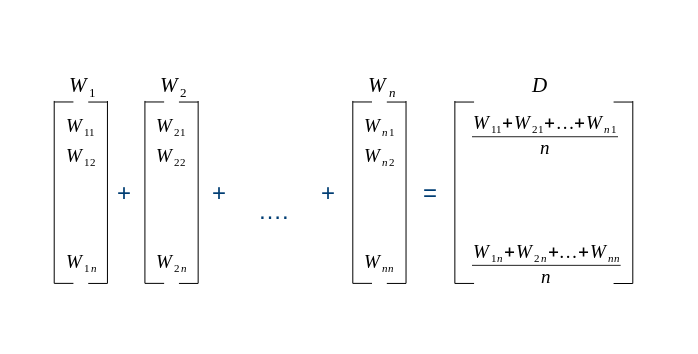

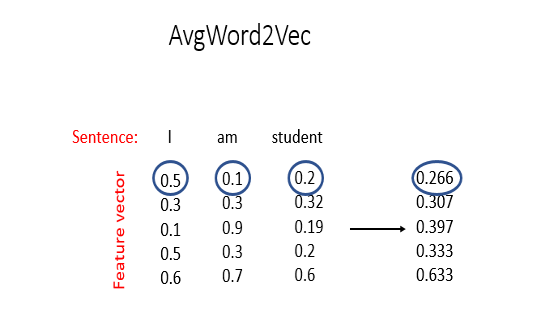

In [53]:
# Let's create a avgword2vec function

def avg_word2vec(sentences):
    transformed = []
    sentence_of_words = []

    for sent in tqdm(sentences):
        sentence_of_words.append(sent.split())

    for i in tqdm(range(len(sentence_of_words))):
        avg = np.mean([model.wv.get_vector(key=word) for word in sentence_of_words[i] if word in model.wv.index_to_key], axis=0)
        transformed.append(avg)
    # convert into array
    return np.asarray(transformed)

In [54]:
xtrain_avgword2vec = avg_word2vec(sentences=x_train)

xtest_avgword2vec = avg_word2vec(sentences=x_test)

100%|██████████| 1293/1293 [00:04<00:00, 301.40it/s]


In [55]:
# There are 3878 sentences and every sentence represented 200-D features vector

xtrain_avgword2vec.shape

(3878, 200)

In [56]:
xtest_avgword2vec.shape

(1293, 200)

In [57]:
xtrain_avgword2vec

array([[ 2.2515091e-03, -4.7098158e-04, -3.2046845e-04, ...,
        -6.8557763e-04,  1.0751417e-03, -5.7418994e-04],
       [-3.3768822e-04, -8.0748444e-04, -2.8889702e-04, ...,
        -9.3984645e-04, -2.4751102e-04, -7.2808895e-04],
       [ 1.8030373e-04,  1.6429013e-04, -1.1663990e-04, ...,
        -1.9559918e-04,  1.5800579e-04, -9.1113710e-05],
       ...,
       [ 5.6034548e-04,  3.4409360e-04,  5.1231233e-05, ...,
         5.4210745e-04,  1.6988853e-03,  4.6293679e-04],
       [ 2.7155909e-05, -1.6374727e-04,  1.5776821e-04, ...,
        -8.7799615e-04, -2.5967593e-04, -7.0632545e-05],
       [-1.7991949e-04, -7.7180812e-05,  1.7097479e-04, ...,
        -3.6155764e-04, -4.4964952e-04, -2.7974194e-04]], dtype=float32)

In [58]:
xtrain_avgword2vec[0]

array([ 2.2515091e-03, -4.7098158e-04, -3.2046845e-04,  8.9696399e-04,
        1.8329519e-03,  6.6478539e-04, -3.1632226e-04,  9.6389861e-04,
       -1.5415909e-03, -8.7183504e-04,  7.8606792e-04, -5.4939033e-04,
        9.1286527e-04,  1.7502835e-03, -8.1092340e-04, -1.0560467e-03,
        1.0619168e-03,  2.2630263e-03, -3.3305190e-04, -1.9998950e-04,
       -1.2723551e-04, -5.0739938e-04,  1.3137183e-03, -1.1065048e-03,
        9.3008101e-04, -1.0698994e-03, -7.7633868e-04,  3.8264296e-04,
        2.7178728e-04, -1.0097780e-03,  2.6860950e-03,  1.4187102e-03,
       -1.0890244e-03, -3.4582725e-04, -1.9738036e-03, -5.4597732e-04,
       -2.3404765e-03,  9.4771967e-04, -1.4543188e-03, -2.3327528e-03,
        4.2649740e-04,  5.2213261e-04,  1.5756087e-03,  2.8381930e-04,
        9.3159615e-05,  7.5869745e-04, -1.7538785e-03, -1.3678017e-03,
        6.4147054e-04, -1.4913565e-03,  2.8920110e-04, -1.8495104e-03,
       -1.9060203e-03, -1.1949921e-03, -1.9342214e-03, -4.8174488e-04,
      

## Model Building

In [99]:
MODEL = []
TRAIN = []
TEST = []
F1_SCORE = []
AUC = []

def model_result(model, train, test, f1, auc):
    MODEL.append(model)
    TRAIN.append(round(train, 2))
    TEST.append(round(test, 2))
    F1_SCORE.append(round(f1, 2))
    AUC.append(round(auc, 2))

**Doc RandomizedSearchCV:** https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV

**Doc GridSearchCV:** https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

In [61]:
# Now you can apply Machine Learning algorithms to predict the target

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (roc_curve, auc, 
                             classification_report,
                             confusion_matrix,
                             f1_score, roc_auc_score)

**Doc KNN:** https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

## **KNeighborsClassifier**

In [62]:
knn = KNeighborsClassifier()

In [63]:
knn_params = {
    "n_neighbors" : [10,15,20,25,30,35,40,45,50,55,60,65,70],
    "metric" : ["minkowski", "manhattan"]
}

In [64]:
knn_model = GridSearchCV(estimator=knn, 
                         param_grid=knn_params, 
                         scoring='accuracy',
                         n_jobs=-1, 
                         cv=5)

In [65]:
knn_model.fit(X=xtrain_avgword2vec, y=y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55,
                                         60, 65, 70]},
             scoring='accuracy')

In [66]:
# best parameters

best_parameters = knn_model.best_params_

print(best_parameters)

{'metric': 'manhattan', 'n_neighbors': 10}


In [67]:
# higest accuracy

highest_accuracy = knn_model.best_score_

print(highest_accuracy)

0.7916468240771533


In [68]:
# Now build the model using this parameters

final_knn_model = KNeighborsClassifier(n_neighbors=10, metric="manhattan")

In [69]:
final_knn_model.fit(X=xtrain_avgword2vec, y=y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [70]:
knn_y_pred = final_knn_model.predict(X=xtest_avgword2vec)

In [71]:
knn_y_pred

array([1, 0, 0, ..., 0, 1, 1])

Testing Accuracy : 83.65 %
Training Accuracy : 81.67 %
------------------------------
Classification Report 

------------------------------
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       918
           1       0.64      0.84      0.73       375

    accuracy                           0.82      1293
   macro avg       0.78      0.82      0.79      1293
weighted avg       0.84      0.82      0.82      1293



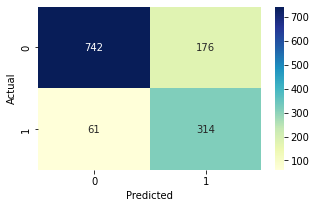

In [72]:
knn_train_score = final_knn_model.score(X=xtrain_avgword2vec, y=y_train)*100
knn_test_score = final_knn_model.score(X=xtest_avgword2vec, y=y_test)*100

print('Testing Accuracy :', round(knn_train_score, 2), "%")
print('Training Accuracy :', round(knn_test_score, 2), "%")

print('-' * 30)
print('Classification Report \n')
print('-' * 30)

print(classification_report(y_true=y_test, y_pred=knn_y_pred))

plt.figure(figsize=(5,3))
data = confusion_matrix(y_true=y_test, y_pred=knn_y_pred)
knn_con = pd.DataFrame(data=data, columns=np.unique(y_test), index = np.unique(y_test))
sns.heatmap(data=knn_con, annot=True, fmt='g', cmap="YlGnBu")
knn_f1 = f1_score(y_true=y_test, y_pred=knn_y_pred)*100
plt.xlabel(xlabel='Predicted')
plt.ylabel(ylabel='Actual')
plt.show()

In [73]:
auc = roc_auc_score(y_true=y_test, y_score=knn_y_pred)
knn_auc = round(auc*100, 2)
print(auc)
print(knn_auc)

0.8228061002178649
82.28


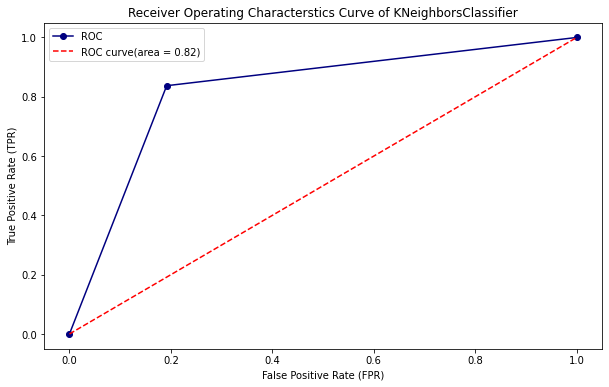

In [74]:
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=knn_y_pred)
plt.figure(figsize=(10,6))
plt.plot(fpr , tpr , color='navy', label='ROC', marker='o')
plt.plot([0,1], [0,1], color = 'red', linestyle='--', label='ROC curve(area = %0.2f)' % auc)
plt.xlabel(xlabel='False Positive Rate (FPR)')
plt.ylabel(ylabel='True Positive Rate (TPR)')
plt.title(label='Receiver Operating Characterstics Curve of KNeighborsClassifier')
plt.legend()
plt.show()

In [100]:
# Store the all score
model_result(model="KNeighborsClassifier", train=knn_train_score, test=knn_test_score, f1=knn_f1, auc=knn_auc)

## **DecisionTreeClassifier**

Doc: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [77]:
dt = DecisionTreeClassifier()

In [76]:
# dt_params = {
#     "criterion": ["gini","entropy",'log_loss'],
#     "splitter": ["best", "random"],
#     "max_depth": [None,2,3,4,5,6],
#     "min_samples_split": range(2,15,1),
#     "max_features": [None, 'auto','sqrt','log2'],
#     'ccp_alpha': [0,1,2,3,4,5,6,7]
# }

dt_params = {
    "criterion": ["gini","entropy"],
    "splitter": ["best"],
    "max_depth": [None,2,5],
    "min_samples_split": range(2,5,1),
    "max_features": [None, 'auto'],
    'ccp_alpha': [0,2,4]
}

In [78]:
dt_model = GridSearchCV(estimator=dt, 
                         param_grid=dt_params, 
                         scoring='accuracy',
                         n_jobs=-1, 
                         cv=5)

In [79]:
dt_model.fit(X=xtrain_avgword2vec, y=y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0, 2, 4],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5],
                         'max_features': [None, 'auto'],
                         'min_samples_split': range(2, 5),
                         'splitter': ['best']},
             scoring='accuracy')

In [81]:
# best parameters

dt_best_parameters = dt_model.best_params_

print(dt_best_parameters)

# higest accuracy

dt_highest_accuracy = dt_model.best_score_

print(dt_highest_accuracy)

{'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_split': 3, 'splitter': 'best'}
0.796796807449285


[1 0 0 ... 0 1 1]
------------------------------
Testing Accuracy : 100.0 %
Training Accuracy : 77.88 %
------------------------------
Classification Report 

------------------------------
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       918
           1       0.62      0.61      0.61       375

    accuracy                           0.78      1293
   macro avg       0.73      0.73      0.73      1293
weighted avg       0.78      0.78      0.78      1293



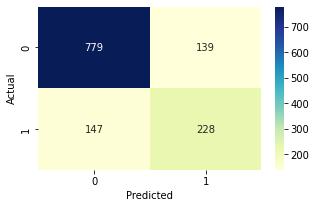

------------------------------
0.7282919389978214
72.83
------------------------------


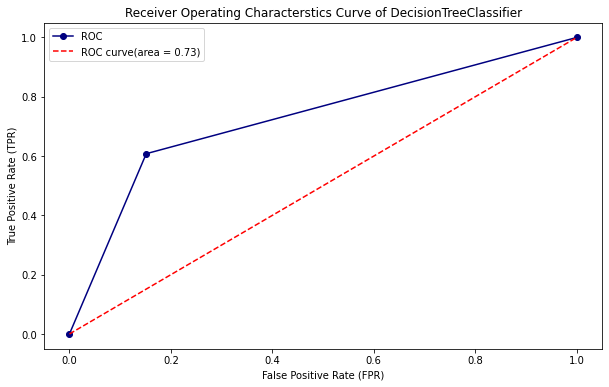

In [82]:
# Now build the model using this parameters

final_dt_model = DecisionTreeClassifier(criterion="entropy", 
                                        splitter="best",
                                        max_depth=None,
                                        max_features=None, 
                                        min_samples_split=3, 
                                        ccp_alpha=0)

final_dt_model.fit(X=xtrain_avgword2vec, y=y_train)
dt_y_pred = final_dt_model.predict(X=xtest_avgword2vec)
print(dt_y_pred)

print('-' * 30)

dt_train_score = final_dt_model.score(X=xtrain_avgword2vec, y=y_train)*100
dt_test_score = final_dt_model.score(X=xtest_avgword2vec, y=y_test)*100

print('Testing Accuracy :', round(dt_train_score, 2), "%")
print('Training Accuracy :', round(dt_test_score, 2), "%")

print('-' * 30)
print('Classification Report \n')
print('-' * 30)

print(classification_report(y_true=y_test, y_pred=dt_y_pred))

plt.figure(figsize=(5,3))
data = confusion_matrix(y_true=y_test, y_pred=dt_y_pred)
dt_con = pd.DataFrame(data=data, columns=np.unique(y_test), index=np.unique(y_test))
sns.heatmap(data=dt_con, annot=True, fmt='g', cmap="YlGnBu")
dt_f1 = f1_score(y_true=y_test, y_pred=dt_y_pred)*100
plt.xlabel(xlabel='Predicted')
plt.ylabel(ylabel='Actual')
plt.show()


auc = roc_auc_score(y_true=y_test, y_score=dt_y_pred)
dt_auc = round(auc*100, 2)
print('-' * 30)
print(auc)
print(dt_auc)
print('-' * 30)

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=dt_y_pred)
plt.figure(figsize=(10,6))
plt.plot(fpr , tpr , color='navy', label='ROC', marker='o')
plt.plot([0,1], [0,1], color = 'red', linestyle='--', label='ROC curve(area = %0.2f)' % auc)
plt.xlabel(xlabel='False Positive Rate (FPR)')
plt.ylabel(ylabel='True Positive Rate (TPR)')
plt.title(label='Receiver Operating Characterstics Curve of DecisionTreeClassifier')
plt.legend()
plt.show()

In [101]:
# Store the all score
model_result(model="DecisionTreeClassifier", train=dt_train_score, test=dt_test_score, f1=dt_f1, auc=dt_auc)

## **RandomForestClassifier**

Doc: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

In [84]:
rf = RandomForestClassifier()

# rf_params = {
#     "n_estimators": [100,200,300],
#     "criterion": ["gini","entropy"],
#     "max_depth": [None,2,5,6],
#     "min_samples_split": range(2,5,1),
#     "max_features": ["sqrt", "log2"],
#     'ccp_alpha': [0,2,4]
# }

rf_params = {
    "n_estimators": [300,400],
    "criterion": ["gini"],
    "max_depth": [None,3],
    "min_samples_split": range(2,5,1),
    "max_features": ["sqrt"],
    'ccp_alpha': [0,2]
}

rf_model = GridSearchCV(estimator=rf, 
                         param_grid=rf_params, 
                         scoring='accuracy',
                         n_jobs=-1, 
                         cv=5)


# rf.fit(X=xtrain_avgword2vec, y=y_train)
rf_model.fit(X=xtrain_avgword2vec, y=y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0, 2], 'criterion': ['gini'],
                         'max_depth': [None, 3], 'max_features': ['sqrt'],
                         'min_samples_split': range(2, 5),
                         'n_estimators': [300, 400]},
             scoring='accuracy')

In [85]:
# best parameters

rf_best_parameters = rf_model.best_params_

print(rf_best_parameters)

# higest accuracy

rf_highest_accuracy = rf_model.best_score_

print(rf_highest_accuracy)

{'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 300}
0.8813854339873629


[1 0 0 ... 0 1 0]
------------------------------
Testing Accuracy : 100.0 %
Training Accuracy : 88.4 %
------------------------------
Classification Report 

------------------------------
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       918
           1       0.91      0.66      0.77       375

    accuracy                           0.88      1293
   macro avg       0.89      0.82      0.85      1293
weighted avg       0.89      0.88      0.88      1293



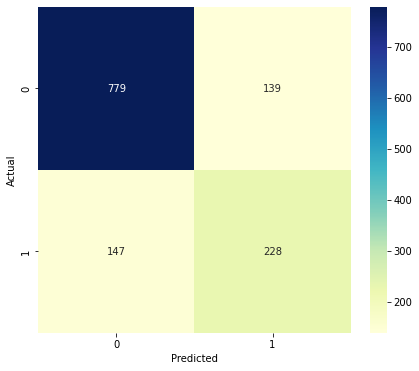

------------------------------
0.8189281045751634
81.89
------------------------------


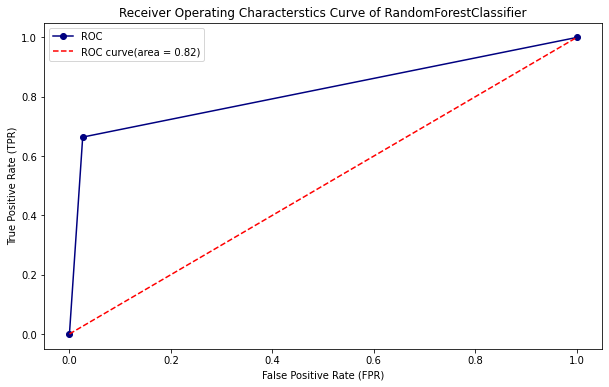

In [86]:
# Now build the model using this parameters

final_rf_model = RandomForestClassifier(n_estimators=300,
                                        criterion="gini",
                                        max_depth=None,
                                        max_features="sqrt", 
                                        min_samples_split=3, 
                                        ccp_alpha=0)

final_rf_model.fit(X=xtrain_avgword2vec, y=y_train)
rf_y_pred = final_rf_model.predict(X=xtest_avgword2vec)
print(rf_y_pred)

print('-' * 30)

rf_train_score = final_rf_model.score(X=xtrain_avgword2vec, y=y_train)*100
rf_test_score = final_rf_model.score(X=xtest_avgword2vec, y=y_test)*100

print('Testing Accuracy :', round(rf_train_score, 2), "%")
print('Training Accuracy :', round(rf_test_score, 2), "%")

print('-' * 30)
print('Classification Report \n')
print('-' * 30)

print(classification_report(y_true=y_test, y_pred=rf_y_pred))

plt.figure(figsize=(7,6))
data = confusion_matrix(y_true=y_test, y_pred=rf_y_pred)
rf_con = pd.DataFrame(data=data, columns=np.unique(y_test), index=np.unique(y_test))
sns.heatmap(data=dt_con, annot=True, fmt='g', cmap="YlGnBu")
rf_f1 = f1_score(y_true=y_test, y_pred=rf_y_pred)*100
plt.xlabel(xlabel='Predicted')
plt.ylabel(ylabel='Actual')
plt.show()


auc = roc_auc_score(y_true=y_test, y_score=rf_y_pred)
rf_auc = round(auc*100, 2)
print('-' * 30)
print(auc)
print(rf_auc)
print('-' * 30)

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=rf_y_pred)
plt.figure(figsize=(10,6))
plt.plot(fpr , tpr , color='navy', label='ROC', marker='o')
plt.plot([0,1], [0,1], color = 'red', linestyle='--', label='ROC curve(area = %0.2f)' % auc)
plt.xlabel(xlabel='False Positive Rate (FPR)')
plt.ylabel(ylabel='True Positive Rate (TPR)')
plt.title(label='Receiver Operating Characterstics Curve of RandomForestClassifier')
plt.legend()
plt.show()

In [102]:
# Store the all score
model_result(model="RandomForestClassifier", train=rf_train_score, test=rf_test_score, f1=rf_f1, auc=rf_auc)

## **SVC**

Doc: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [88]:
lsvc = SVC()

lsvc_params = {
    "C": [1.0,2.0],
    "kernel": ["rbf", "poly", "linear"],
    "degree" : [3,4],
}

lsvc_model = GridSearchCV(estimator=lsvc, 
                         param_grid=lsvc_params, 
                         scoring='accuracy',
                         n_jobs=-1, 
                         cv=5)

lsvc_model.fit(X=xtrain_avgword2vec, y=y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1.0, 2.0], 'degree': [3, 4],
                         'kernel': ['rbf', 'poly', 'linear']},
             scoring='accuracy')

In [89]:
# best parameters

lsvc_best_parameters = lsvc_model.best_params_

print(lsvc_best_parameters)

# higest accuracy

lsvc_highest_accuracy = lsvc_model.best_score_

print(lsvc_highest_accuracy)

{'C': 2.0, 'degree': 3, 'kernel': 'rbf'}
0.923678084469571


[1 0 0 ... 0 1 0]
------------------------------
Testing Accuracy : 98.25 %
Training Accuracy : 94.28 %
------------------------------
Classification Report 

------------------------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       918
           1       0.91      0.89      0.90       375

    accuracy                           0.94      1293
   macro avg       0.93      0.93      0.93      1293
weighted avg       0.94      0.94      0.94      1293



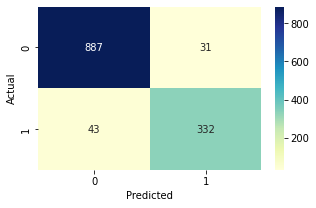

------------------------------
0.9257821350762528
92.58
------------------------------


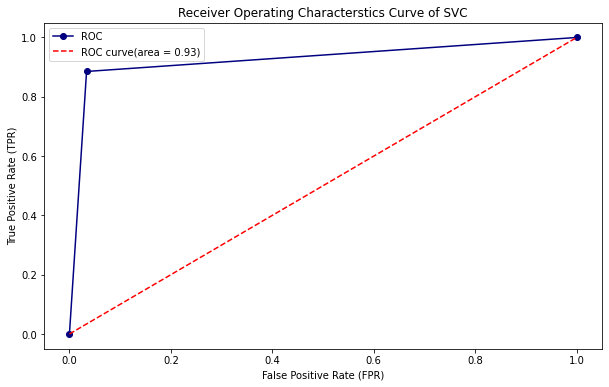

In [91]:
# Now build the model using this parameters

final_lsvc_model = SVC(C=2.0, degree=3, kernel='rbf')

final_lsvc_model.fit(X=xtrain_avgword2vec, y=y_train)
lsvc_y_pred = final_lsvc_model.predict(X=xtest_avgword2vec)
print(lsvc_y_pred)

print('-' * 30)

lsvc_train_score = final_lsvc_model.score(X=xtrain_avgword2vec, y=y_train)*100
lsvc_test_score = final_lsvc_model.score(X=xtest_avgword2vec, y=y_test)*100

print('Testing Accuracy :', round(lsvc_train_score, 2), "%")
print('Training Accuracy :', round(lsvc_test_score, 2), "%")

print('-' * 30)
print('Classification Report \n')
print('-' * 30)

print(classification_report(y_true=y_test, y_pred=lsvc_y_pred))

plt.figure(figsize=(5,3))
data = confusion_matrix(y_true=y_test, y_pred=lsvc_y_pred)
lsvc_con = pd.DataFrame(data=data, columns=np.unique(y_test), index = np.unique(y_test))
sns.heatmap(data=lsvc_con, annot=True, fmt='g', cmap="YlGnBu")
lsvc_f1 = f1_score(y_true=y_test, y_pred=lsvc_y_pred)*100
plt.xlabel(xlabel='Predicted')
plt.ylabel(ylabel='Actual')
plt.show()


auc = roc_auc_score(y_true=y_test, y_score=lsvc_y_pred)
lsvc_auc = round(auc*100, 2)
print('-' * 30)
print(auc)
print(lsvc_auc)
print('-' * 30)

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=lsvc_y_pred)
plt.figure(figsize=(10,6))
plt.plot(fpr , tpr , color='navy', label='ROC', marker='o')
plt.plot([0,1], [0,1], color = 'red', linestyle='--', label='ROC curve(area = %0.2f)' % auc)
plt.xlabel(xlabel='False Positive Rate (FPR)')
plt.ylabel(ylabel='True Positive Rate (TPR)')
plt.title(label='Receiver Operating Characterstics Curve of SVC')
plt.legend()
plt.show()

In [103]:
# Store the all score
model_result(model="SVC", train=lsvc_train_score, test=lsvc_test_score, f1=lsvc_f1, auc=lsvc_auc)

## **cross validation**

In [104]:
cv_scores = []

In [105]:
# KNN
cv_score1 = cross_val_score(estimator=final_knn_model,
                           X=xtrain_avgword2vec,
                           y=y_train, cv=10)

print(cv_score1)
print(cv_score1.mean())

cv_scores.append(cv_score1.mean())

[0.77319588 0.75515464 0.79639175 0.84278351 0.82474227 0.78092784
 0.77319588 0.83247423 0.82687339 0.79328165]
0.7999021018141133


In [106]:
# DecesionTree
cv_score2 = cross_val_score(estimator=final_dt_model,
                           X=xtrain_avgword2vec,
                           y=y_train, cv=10)

print(cv_score2)
print(cv_score2.mean())
cv_scores.append(cv_score2.mean())

[0.78350515 0.80154639 0.7242268  0.79896907 0.80154639 0.79639175
 0.7757732  0.82989691 0.77260982 0.78036176]
0.7864827246330484


In [107]:
# RandomForest
cv_score3 = cross_val_score(estimator=final_rf_model,
                           X=xtrain_avgword2vec,
                           y=y_train, cv=10)

print(cv_score3)
print(cv_score3.mean())
cv_scores.append(cv_score3.mean())

[0.84793814 0.88659794 0.86597938 0.90721649 0.86340206 0.89175258
 0.85309278 0.89690722 0.87338501 0.90180879]
0.8788080396387757


In [108]:
# SVC
cv_score4 = cross_val_score(estimator=final_lsvc_model,
                           X=xtrain_avgword2vec,
                           y=y_train, cv=10)

print(cv_score4)
print(cv_score4.mean())
cv_scores.append(cv_score4.mean())

[0.89175258 0.92268041 0.90721649 0.94072165 0.91237113 0.92268041
 0.93298969 0.94587629 0.91989664 0.94573643]
0.9241921734729216


In [109]:
cv_scores

[0.7999021018141133,
 0.7864827246330484,
 0.8788080396387757,
 0.9241921734729216]

## **Models Comparison & Evaluation**

In [110]:
results = pd.DataFrame(data={'Models': MODEL,
                         'Testing Accuracy': TEST,
                         'Training Accuracy': TRAIN,
                         'F1_Score': F1_SCORE,
                         'AUC_Score': AUC,
                         'CV_Score' : cv_scores})
results

,Models,Testing Accuracy,Training Accuracy,F1_Score,AUC_Score,CV_Score
0,KNeighborsClassifier,81.67,83.65,72.60,82.28,0.799902
1,DecisionTreeClassifier,77.88,100.00,61.46,72.83,0.786483
2,RandomForestClassifier,88.40,100.00,76.85,81.89,0.878808
3,SVC,94.28,98.25,89.97,92.58,0.924192


### Conclusion

In case of Spam mail Detection, we will more focus of False Possitives. This is so because, In case of False-Possitive the model will predict the unspam mail as a spam which results in loss of some useful data. If the ham mail that was recognised as spam contain any important information, it will not be reached to the user.
The model that was obtained in this notebook has very less False possitive when compare to False Negatives.

In [113]:
# Let's create a function to predict ham or spam

def test(text):
    sentence_of_words = []
    transformed = []
    # Regular expression that removes all the html tags pressent in the reviews
    text = re.sub(pattern='(<[\w\s]*/?>)', repl="", string=text)

    # Expanding all the contractions present in the review to is respective actual form
    text = contractions.fix(text)

    # Removing all the special charactesrs from the review text
    text = re.sub(pattern='[^a-zA-Z0-9\s]+', repl="", string=text)

    # Removing all the digits present in the review text
    text = re.sub(pattern='\d+', repl="", string=text)

    # Making all the review text to be of lower case as well as removing the stopwords and words of length less than 3
    text = " ".join([word.lower() for word in text.split() if word not in all_stopwords and len(word)>=3])

    sentence_of_words.append(text.split())

    for i in range(len(sentence_of_words)):
        avg = np.mean([model.wv.get_vector(key=word) for word in sentence_of_words[0] if word in model.wv.index_to_key], axis=0)
        transformed.append(avg)
    # convert into array
    avgword2vec_array = np.asarray(transformed)

    if final_lsvc_model.predict(X=avgword2vec_array)[0] == 1:
        print("The Email is Spam")
    else:
        print("The Email is Not Spam")


In [114]:
test("Hay, One Interesting news for you. You got an iphone 11 pro max")

The Email is Spam


In [115]:
test("Hi, This is Alamin. Please come to office timely yesterday")

The Email is Not Spam


In [116]:
test("""This Rajasthan IT Day Department of Information Technology & Communications (DOIT&C) & iStart bring to you 2 Mega Hack-A-Thons in association with PW Skills (iNeuron)With a chance to win work orders of up to 25 Lakhs while attending Job fair and start up expo.
Travel & Accommodation will be provided to shortlisted candidates for the Offline Hackathon (AC 3 Tier). Food and accommodation will be provided at the venue""")

The Email is Not Spam


## **save model**

In [117]:
import pickle

In [118]:
# Save the gensim model that we have trained on our own corpus
pickle.dump(obj=model, file=open(file="gensim_model", mode="wb"))

# Save the machine learning model
pickle.dump(obj=final_lsvc_model, file=open(file="ml_model", mode="wb"))

# Save the all stopwords list
pickle.dump(obj=all_stopwords, file=open(file="all_stopwords", mode="wb"))

## **Load and test**

In [119]:
l_stopwords = pickle.load(file=open(file="/content/all_stopwords", mode="rb"))
gensim_model = pickle.load(file=open(file="/content/gensim_model", mode="rb"))
ml_model = pickle.load(file=open(file="/content/ml_model", mode="rb"))

In [120]:
# Let's create a function to predict ham or spam

def test2(text):
    sentence_of_words = []
    transformed = []
    # Regular expression that removes all the html tags pressent in the reviews
    text = re.sub(pattern='(<[\w\s]*/?>)', repl="", string=text)

    # Expanding all the contractions present in the review to is respective actual form
    text = contractions.fix(text)

    # Removing all the special charactesrs from the review text
    text = re.sub(pattern='[^a-zA-Z0-9\s]+', repl="", string=text)

    # Removing all the digits present in the review text
    text = re.sub(pattern='\d+', repl="", string=text)

    # Making all the review text to be of lower case as well as removing the stopwords and words of length less than 3
    text = " ".join([word.lower() for word in text.split() if word not in l_stopwords and len(word)>=3])

    sentence_of_words.append(text.split())

    for i in range(len(sentence_of_words)):
        avg = np.mean([gensim_model.wv.get_vector(key=word) for word in sentence_of_words[0] if word in gensim_model.wv.index_to_key], axis=0)
        transformed.append(avg)
    # convert into array
    avgword2vec_array = np.asarray(transformed)

    if ml_model.predict(X=avgword2vec_array)[0] == 1:
        print("The Email is Spam")
    else:
        print("The Email is Not Spam")


In [121]:
test2("Hay, One Interesting news for you. You got an iphone 11 pro max")

The Email is Spam


In [122]:
!python --version

Python 3.9.16
